### use of spike interface practice
#### following getting started tutorial on:
https://spikeinterface.readthedocs.io/en/latest/getting_started/plot_getting_started.html

-ag 2/18/20

In [4]:

import spikeinterface.extractors as se
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
import matplotlib
%matplotlib inline  

In [5]:
recording, sorting_true = se.example_datasets.toy_example(duration=10, num_channels=4, seed=0)

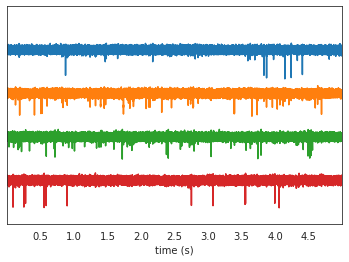

In [6]:
w_ts = sw.plot_timeseries(recording, trange = [0,5])

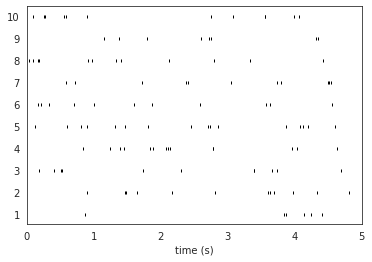

In [7]:
w_rs = sw.plot_rasters(sorting_true,trange=[0,5])

In [8]:
channel_ids = recording.get_channel_ids()
fs = recording.get_sampling_frequency()
num_chan = recording.get_num_channels()

print('Channel ids:', channel_ids)
print('Sampling frequency:', fs)
print('Number of channels:', num_chan)

Channel ids: [0, 1, 2, 3]
Sampling frequency: 30000.0
Number of channels: 4


In [9]:
unit_ids = sorting_true.get_unit_ids()
spike_train = sorting_true.get_unit_spike_train(unit_id=unit_ids[0])

print('Unit ids:', unit_ids)
print('Spike train of first unit:', spike_train)

Unit ids: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Spike train of first unit: [ 26140 115033 116213 124399 127218 132251 159224 163465 164645 164924
 171643 193769 194758 216044 233794 234159 234303 239748 261425 277679
 294447]


In [10]:
recording_f = st.preprocessing.bandpass_filter(recording, freq_min=300, freq_max=5000)
recording_cmr = st.preprocessing.common_reference(recording_f, reference='median')

In [11]:
print('Available sorters', ss.available_sorters())
print('Installed sorters', ss.installed_sorter_list)

Available sorters ['herdingspikes', 'ironclust', 'kilosort', 'kilosort2', 'klusta', 'mountainsort4', 'spykingcircus', 'tridesclous', 'waveclus']
Installed sorters [<class 'spikesorters.klusta.klusta.KlustaSorter'>, <class 'spikesorters.tridesclous.tridesclous.TridesclousSorter'>, <class 'spikesorters.mountainsort4.mountainsort4.Mountainsort4Sorter'>, <class 'spikesorters.spyking_circus.spyking_circus.SpykingcircusSorter'>, <class 'spikesorters.herdingspikes.herdingspikes.HerdingspikesSorter'>]


In [12]:
print(ss.get_default_params('mountainsort4'))
print()
print(ss.get_default_params('klusta'))
print()
print(ss.get_default_params('spykingcircus'))
print()
print(ss.get_default_params('herdingspikes'))

{'detect_sign': -1, 'adjacency_radius': -1, 'freq_min': 300, 'freq_max': 6000, 'filter': False, 'whiten': True, 'curation': False, 'num_workers': None, 'clip_size': 50, 'detect_threshold': 3, 'detect_interval': 10, 'noise_overlap_threshold': 0.15}

{'probe_file': None, 'adjacency_radius': None, 'threshold_strong_std_factor': 5, 'threshold_weak_std_factor': 2, 'detect_sign': -1, 'extract_s_before': 16, 'extract_s_after': 32, 'n_features_per_channel': 3, 'pca_n_waveforms_max': 10000, 'num_starting_clusters': 50}

{'probe_file': None, 'detect_sign': -1, 'adjacency_radius': 200, 'detect_threshold': 6, 'template_width_ms': 3, 'filter': True, 'merge_spikes': True, 'auto_merge': 0.5, 'num_workers': None, 'electrode_dimensions': None, 'whitening_max_elts': 1000, 'clustering_max_elts': 10000}

{'clustering_bandwidth': 5.0, 'clustering_alpha': 6.0, 'clustering_n_jobs': -1, 'clustering_bin_seeding': True, 'clustering_min_bin_freq': 8, 'clustering_subset': None, 'left_cutout_time': 0.2, 'right_cut

In [13]:
sort_ms4 = ss.run_mountainsort4(recording=recording_cmr, whiten=False, num_workers=4, detect_threshold=6)

In [14]:
sort_skc = ss.run_spykingcircus(recording=recording_cmr, filter=False, num_workers=4)

RUNNING SHELL SCRIPT: /tmp/tmp_shellscriptsw4yya5w/script.sh


/home/alexgonzalez/anaconda3/envs/spk/lib/python3.7/site-packages/spikeextractors/extractors/spykingcircusextractors/spykingcircusextractors.py:113: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f_results = h5py.File(results)


In [19]:
sort_Klusta = ss.run_klusta(recording=recording_cmr)

RUNNING SHELL SCRIPT: /tmp/tmp_shellscriptzs1213eu/script.sh


/home/alexgonzalez/anaconda3/envs/spk/lib/python3.7/site-packages/spikeextractors/extractors/klustaextractors/klustaextractors.py:76: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  F = h5py.File(kwikfile)


In [22]:
sort_HS = ss.run_herdingspikes(recording=recording_cmr)

# Generating new position and neighbor files from data file
# Not Masking any Channels
# Sampling rate: 30000
# Localization On
# Number of recorded channels: 4
# Analysing frames: 300000; Seconds: 10.0
# Frames before spike in cutout: 6
# Frames after spike in cutout: 30
# tcuts: 48 72
# tInc: 100000
# Analysing frames from -48 to 100072  (0.0%)
# Analysing frames from 99952 to 200072  (33.3%)
# Analysing frames from 199952 to 300000  (66.7%)
# Detection completed, time taken: 0:00:00.421647
# Time per frame: 0:00:00.001405
# Time per sample: 0:00:00.000351
Loaded 245 spikes.
Fitting dimensionality reduction using all spikes...
...projecting...
...done
Clustering...
Clustering 245 spikes...
number of seeds: 13
seeds/job: 1
using 20 cpus
Number of estimated units: 4
Saving to /home/alexgonzalez/Documents/TreeMazeAnalyses/Analyses/tmp_herdingspikes/HS2_sorted.hdf5


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  14 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.1s finished


OSError: Unable to create file (unable to truncate a file which is already open)

In [21]:
sort_TC = ss.run_tridesclous(recording=recording_cmr)

KeyError: 'clean_waveforms'

In [23]:
print('Units found by Mountainsort4:', sort_ms4.get_unit_ids())
print('Units found by Spyking-Circus:', sort_skc.get_unit_ids())
print('Units found by Klusta:', sort_Klusta.get_unit_ids())

Units found by Mountainsort4: [1, 2, 3, 4, 5, 6, 7]
Units found by Spyking-Circus: [0, 1, 10, 11, 2, 3, 4, 5, 6, 7, 8, 9]
Units found by Klusta: [0, 2, 3, 4, 5, 6, 7, 8]


In [24]:
snrs = st.validation.compute_snrs(sort_ms4, recording_cmr)
isi_violations = st.validation.compute_isi_violations(sort_ms4)
isolations = st.validation.compute_isolation_distances(sort_ms4, recording)

print('SNR', snrs)
print('ISI violation ratios', isi_violations)
print('Isolation distances', isolations)

SNR [ 2.71640916  2.711471   18.44119416 12.02550826  2.7382418   2.72363473
 26.1237045 ]
ISI violation ratios [0.36799357 0.37582756 0.         0.         0.34378977 0.3601997
 0.        ]
Isolation distances [  14.02964528   18.60214531  278.04153621  342.79830102   11.13349213
   16.09105877 1436.77670781]


In [25]:
comp_gt_KL = sc.compare_sorter_to_ground_truth(gt_sorting=sorting_true, tested_sorting=sort_Klusta)
comp_KL_MS4 = sc.compare_two_sorters(sorting1=sort_Klusta, sorting2=sort_ms4)
comp_multi = sc.compare_multiple_sorters(sorting_list=[sort_ms4, sort_Klusta, sort_skc],
                                         name_list=['klusta', 'ms4','circus'])


In [26]:
comp_gt_KL.get_performance()

,accuracy,recall,precision,false_discovery_rate,miss_rate
gt_unit_id,,,,,
1,0.875,1,0.875,0.125,0
2,0.923077,1,0.923077,0.0769231,0
3,0,0,0,0,0
4,0.884615,0.884615,1,0,0.115385
5,0,0,0,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,0,0,0,0,0
9,0,0,0,0,0


In [27]:
mapped_units = comp_KL_MS4.get_mapped_sorting1().get_mapped_unit_ids()

print('Klusta units:', sort_Klusta.get_unit_ids())
print('Mapped Mountainsort4 units:', mapped_units)

Klusta units: [0, 2, 3, 4, 5, 6, 7, 8]
Mapped Mountainsort4 units: [-1, 7, -1, -1, -1, -1, -1, 4]


Units in agreement between Klusta and Mountainsort4: [2, 3, 6, 7, 12]


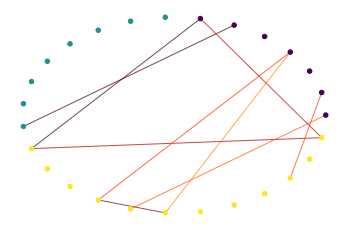

In [28]:
sorting_agreement = comp_multi.get_agreement_sorting(minimum_matching=2)

print('Units in agreement between Klusta and Mountainsort4:', sorting_agreement.get_unit_ids())

w_multi = sw.plot_multicomp_graph(comp_multi)

